In [2]:
from IPython.display import Image

# Introduction

This short guide explains steps necesary to run GPU instance on AWS.

I assume you're already created AWS account on aws.amazon.com

Notice: From my personal experience the AWS region which works without interuptions in China is "North Virginia"

## Key pair

Keipair allows you to connect to your AWS instance without typing password. This gide assumes you already have created key pair.

If not:

- in "EC2 Dashbord", section "NETWORK & SECURITY" choose "Key Pairs" 

- click button "Create Key Pair". 

- give it a name and it will be automatically downloaded to your local computer

Store it in secure location

## Configure security group:

Go to "EC2 Dashbord"
From left menu in section "NETWORK & SECURITY" choose "Security Groups"
Click button "Create Security Group"

Name your security group, create following inbound rules:

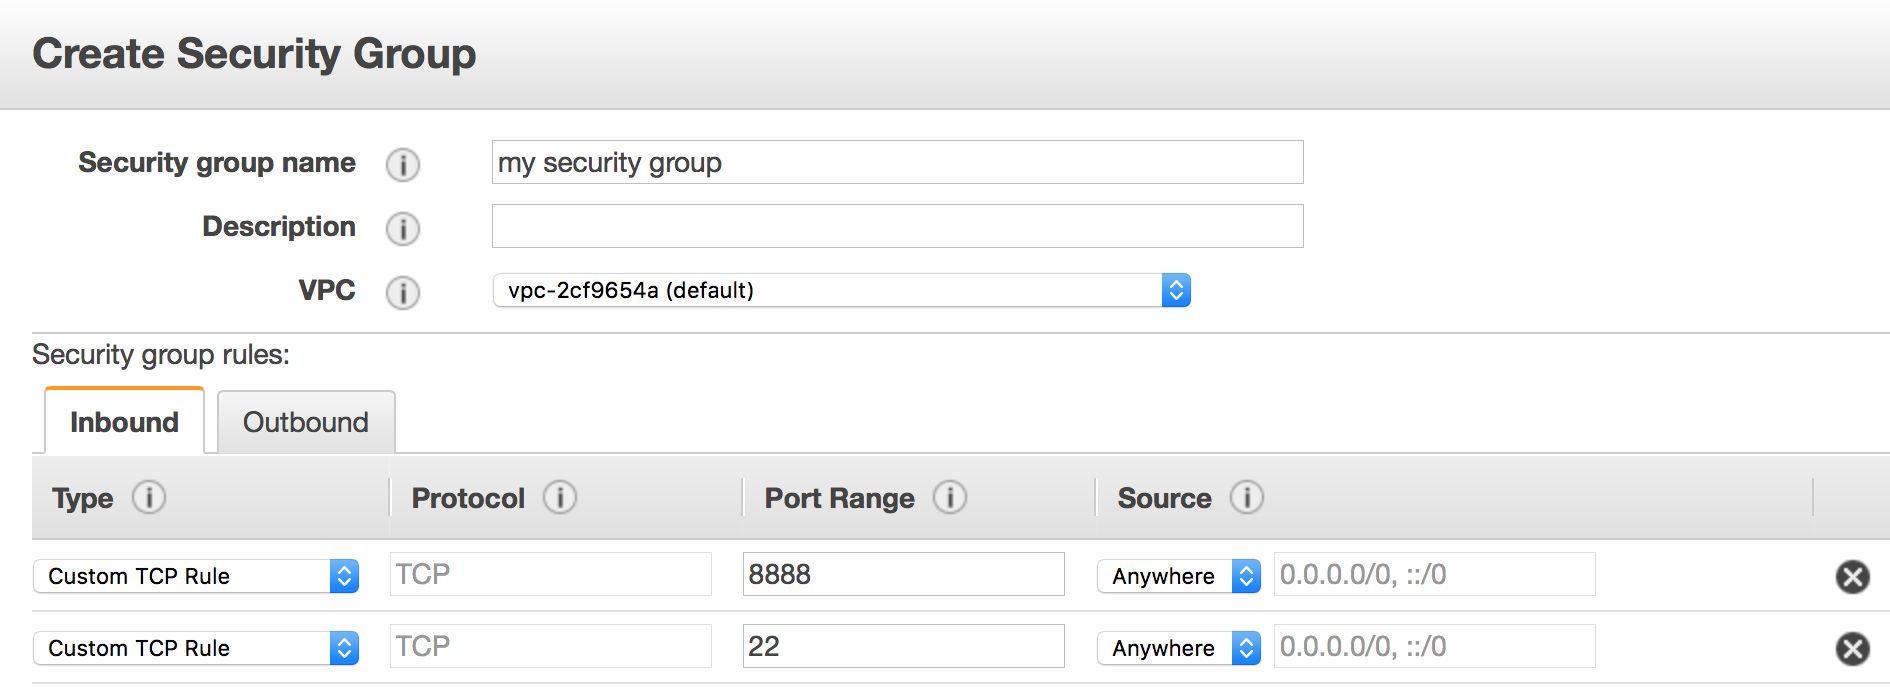

In [4]:
Image("img/security_group.png")

and click button "Create".

These rules open port 22, to allow you to connect to server using ssh, and port 8888 to connect to your jupyter notebook

## AMI instance

I've preconfigured AMI to run lessons from fast.ai and any other Jupyter notebook that uses Keras or Tensorflow.
It's based on: https://github.com/mGalarnyk/Installations_Mac_Ubuntu_Windows/tree/master/AWS

and later extended with:

* Tensorflow

* Keras

* CUDA and CuDNN to run Tensorflow on GPU

## Launch new instance

**Step 1** In "EC2 Dashbord", section "IMAGES" choose "AMIs" 

**Step 2** In search bar select "Public images" and search for AMI I've created. AMI name is "DL Shanghai"

It should look similar to this:

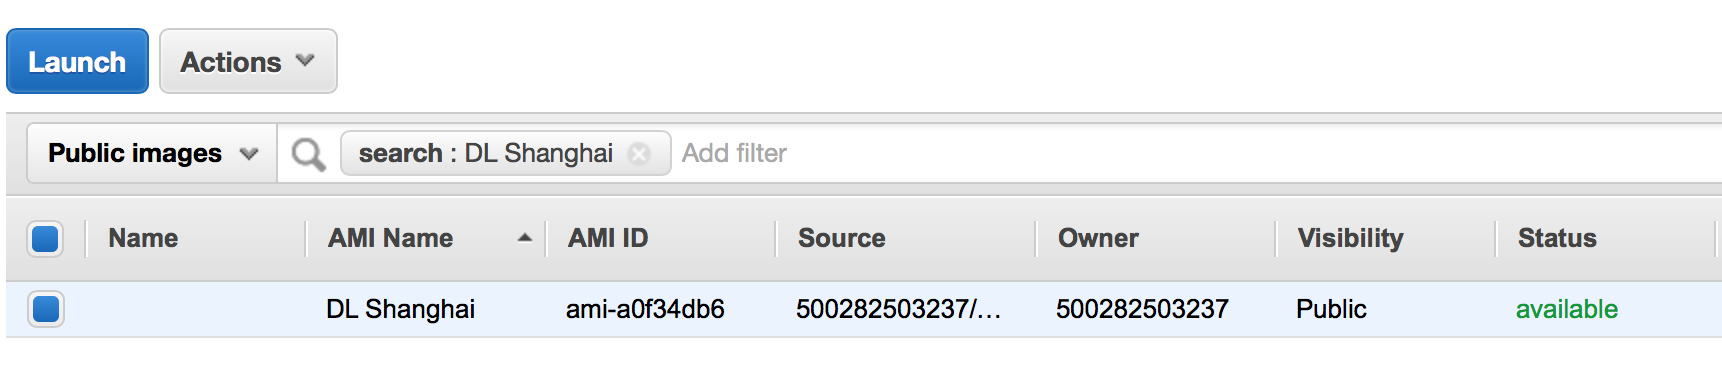

In [5]:
Image("img/ami.png")

**Step 3** Select the image and click "Launch" button

**Step 4** On step "2. Choose Instance Type" select instance that uses GPU, e.g. p2.xlarge or g2.2xlarge

and click "Next" button

**Step 5** To create Spot instance, select checkbox "Request Spot instances" and place your bid. 

Bids that work for me are usualy 0.1 more than average of "Current price"

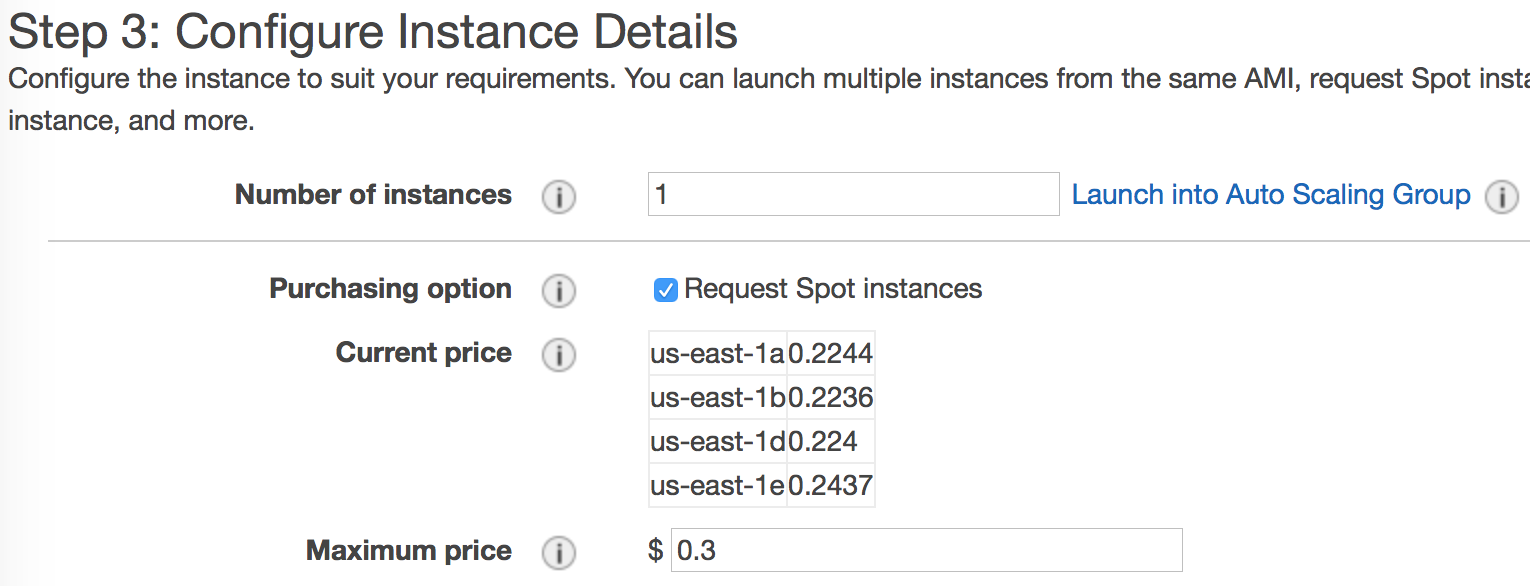

In [6]:
Image("img/spot.png")

click "Next" button

**Step 6** On "Step 4: Add Storage" choose your volume size, depending on how big is your dataset. From my experience 25GB is enough for small datasets.

Click "Next"

**Step 7**  On "Step 5: Tag Spot Request" just hit "Next"

**Step 8** On "Step 6: Configure Security Group" choose option "Select an existing security group" and select your security group (check at the top of the guide if you don't have one)

Click "Review and Launch" button

**Step 9** On step "Step 7: Review Spot Instance Request" click "Launch"

**Step 10** Select your key pair as shown on the image below and click "Request Spot Instances"

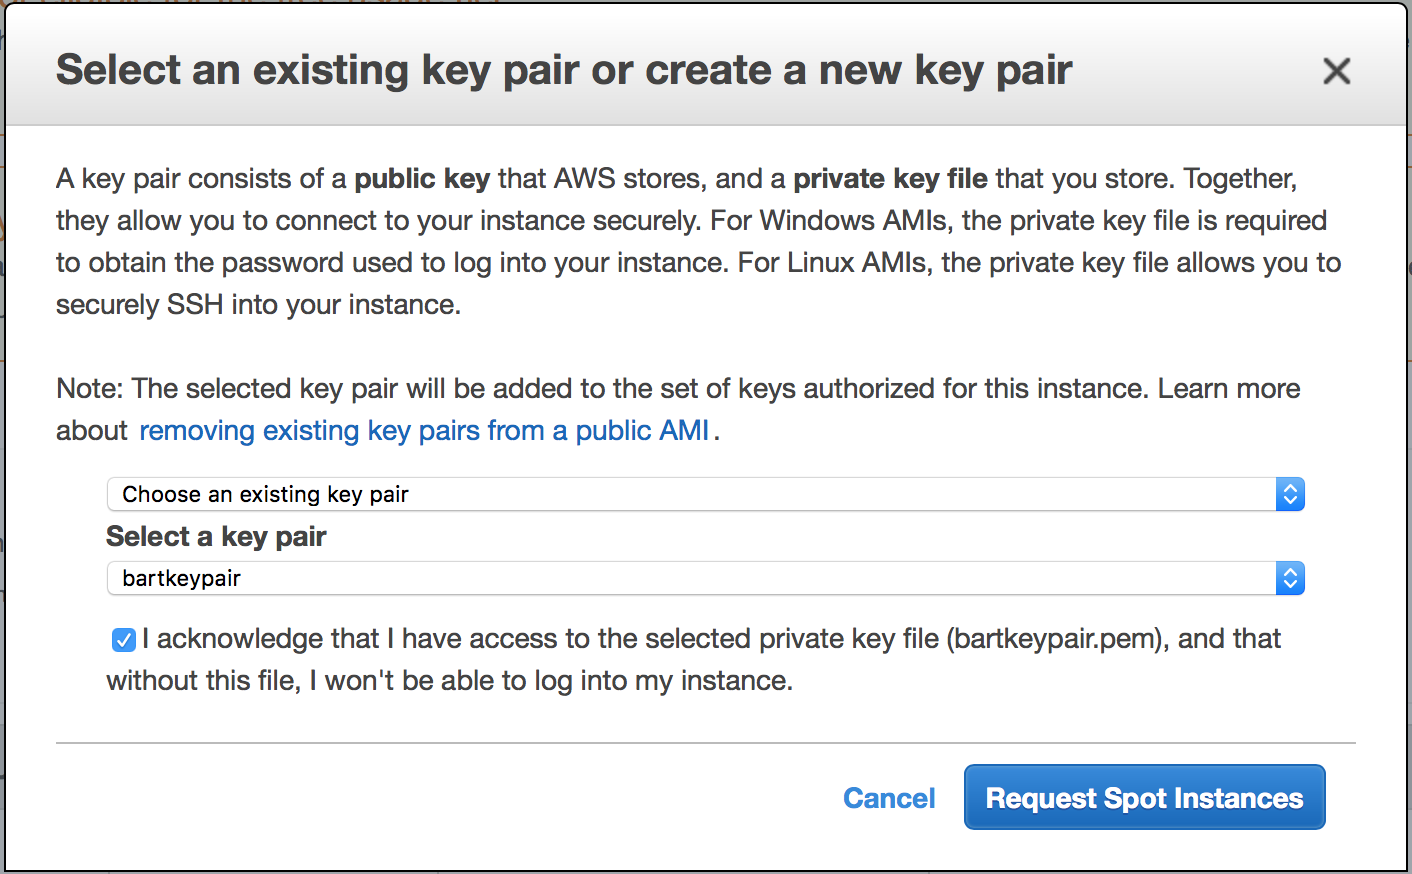

In [11]:
Image("img/kpair.png", width=600)

**Step 11** After about one minute, your instance should get state "fulfilled" which means it has launched.

If e.g. your bid was too low, you will receive appropriate message. In that case, repeat all steps but this time bid a little bit more

**Step 12** Your instance is launched, go to "EC2 Dashboard" to see all instances running.

Choose your newly created instance and copy "Public IP"

## Connecting to instance

**Step 1** Using terminal, connect (using ssh) to instance

    ssh -i {location of your your PEM key} ubuntu@<Instance public IP>

where:

- {Instance public IP} is "Public IP" you copied from **Step 12**

- {location of your your PEM key} is a full path to where you store your PEM key

e.g. ```ssh -i /home/ubuntu/.ssh/my_key.pem ubuntu@54.33.103.144```


**Step 2** Create folder where you're going to keep your notebooks:

    cd /home/ubuntu
    mkdir my_notebooks


**Step 3** Go to notebooks folder and start jupyter

    cd my_notebooks
    nohup jupyter notebooks &

('nohup' and '&' part of the command above will make it run in the background)

**Step 4** Open browser and navigate to your notebook:

    https://<instance IP>:8888

e.g. https://54.33.103.144:8888

Note: we're using secure connection to notebook, it's not http:// but https://

Remember: When you're connecting to your notebook, don't use VPN. Also  and don't use Safari beca. 

The pass


## Stopping or terminating the instance

**This step is really important. If you forget to turn your instance off, you will be charged until it's on!**

Go to "EC2 Dashboard", right-click on instance you want to stop/terminate and select one of two as shown on image below

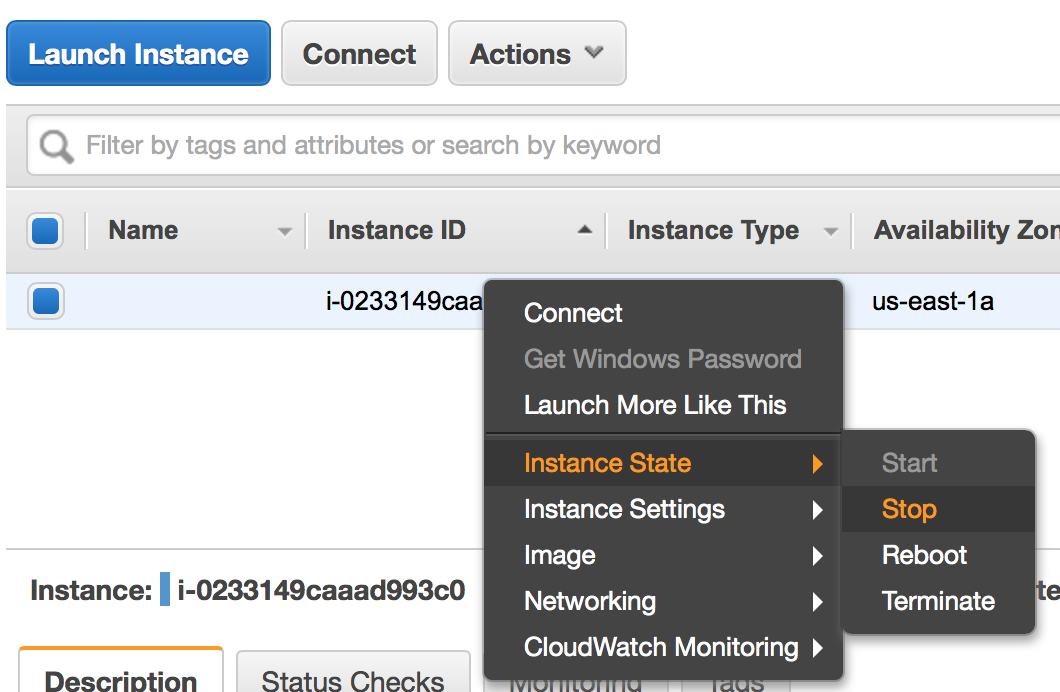

In [6]:
Image("img/terminate_stop.png", width=500)